In [5]:
# SHOWING THE STRESS LEVEL PER BMI CAT

import pandas as pd

df = pd.read_csv(r'C:\\Users\\AMD\\Desktop\\Sueño y estilo de vida.csv', sep=';')

df.fillna(0, inplace=True)

########


df[['Quality of Sleep', 'Stress Level']].groupby(['Quality of Sleep']).agg('mean').round (2)


tabla_dinamica2 = df.pivot_table(
    index='Stress Level', # Columna(s) que se utilizarán como índice de filas
    values='Physical Activity Level',       # Columna cuyos valores serán agregados (normalmente es numérica)
#     columns= 'Sleep Disorder',    # Columna cuyos valores se utilizarán como encabezados de columna
    aggfunc= ('mean', 'max')     
)


# tabla_dinamica2


df[['BMI Category', 'Stress Level']].groupby(['BMI Category']).agg('mean').round (2)





,Stress Level
BMI Category,
Normal,5.13
Obese,5.70
Overweight,5.73


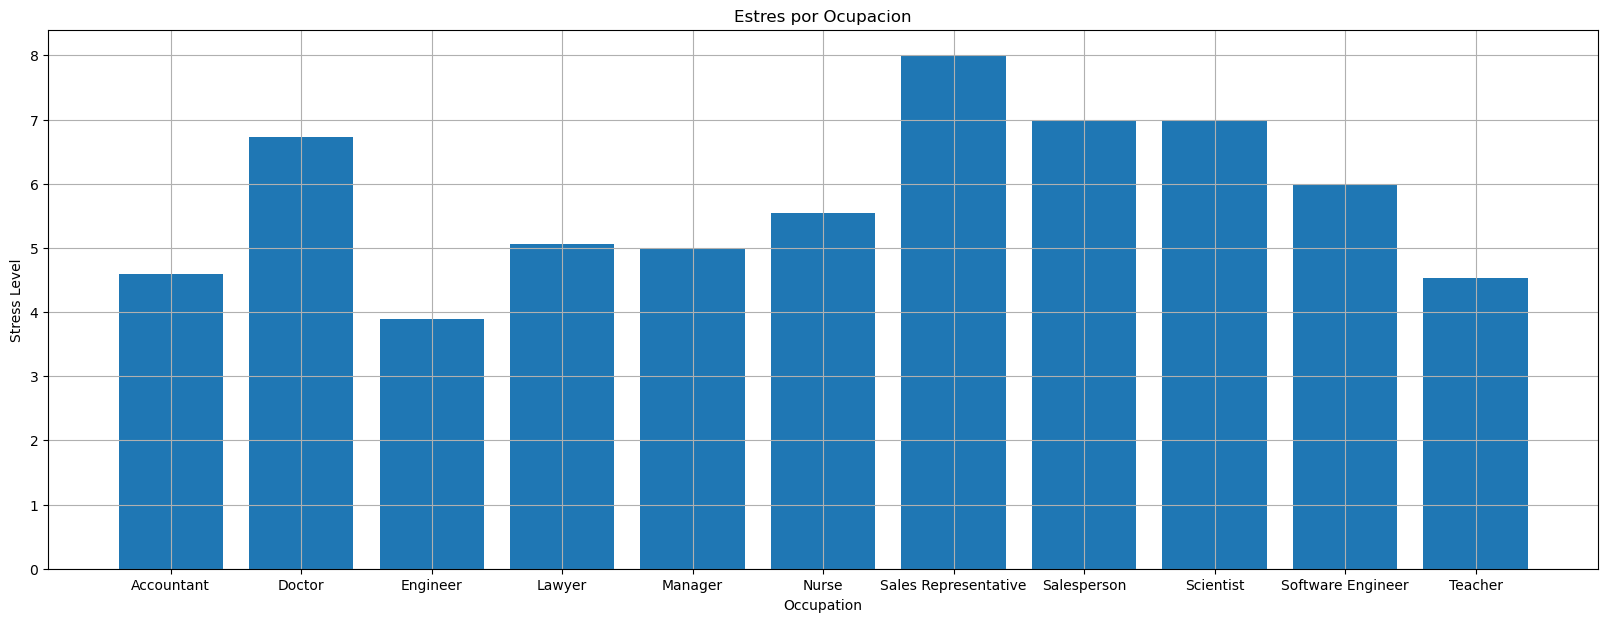

In [3]:
# SHOWING A BAR CHART SHOWING THE STRESS LEVELS PER OCCUPATION


import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r'C:\\Users\\AMD\\Desktop\\Sueño y estilo de vida.csv', sep=';')

df.fillna(0, inplace=True)


Occ_estres = df[['Occupation', 'Stress Level']].groupby(['Occupation']).agg('mean').round (2)

ocupaciones = Occ_estres.index
niveles_de_estres = Occ_estres['Stress Level']


plt.figure(figsize=(20, 7))

# create bar chart

plt.bar(ocupaciones, niveles_de_estres)

# customize chart
plt.xlabel('Occupation')
plt.ylabel('Stress Level')
plt.title('Estres por Ocupacion')
plt.grid(True)

# show chart

plt.show()

In [4]:
# FILTERING THE INFO FOR THE SALES REPS OCUPATION

import pandas as pd

df = pd.read_csv(r'C:\\Users\\AMD\\Desktop\\Sueño y estilo de vida.csv', sep=';')

df.fillna(0, inplace=True)


filtro_sales_representative = df.loc[df['Occupation'] == 'Sales Representative']

# showing filtered info

filtro_sales_representative



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [18]:
# COUNT OF SLEEP DISORDERS BASED ON THE BMI CATAGORY


import pandas as pd

df = pd.read_csv(r'C:\\Users\\AMD\\Desktop\\Sueño y estilo de vida.csv', sep=';')

df.fillna(0, inplace=True)


# aggr = {
#     'Blood Pressure': ['max', 'min']
# }

# resultado = df.groupby('BMI Category').agg(aggr)


# resultado

######

# aggr = {
#     'Heart Rate': ['max', 'min']
# }

# resultado = df.groupby('BMI Category').agg(aggr)


# resultado

### 

# conteo_por_peso = df.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)

# # Mostrar los resultados

# conteo_por_peso



Sleep Disorder,Insomnia,None,Sleep Apnea
BMI Category,,,
Normal,9,200,7
Obese,4,0,6
Overweight,64,19,65


Sleep Disorder   Insomnia       None  Sleep Apnea
Gender                                           
Female          19.459459  44.324324    36.216216
Male            21.693122  72.486772     5.820106


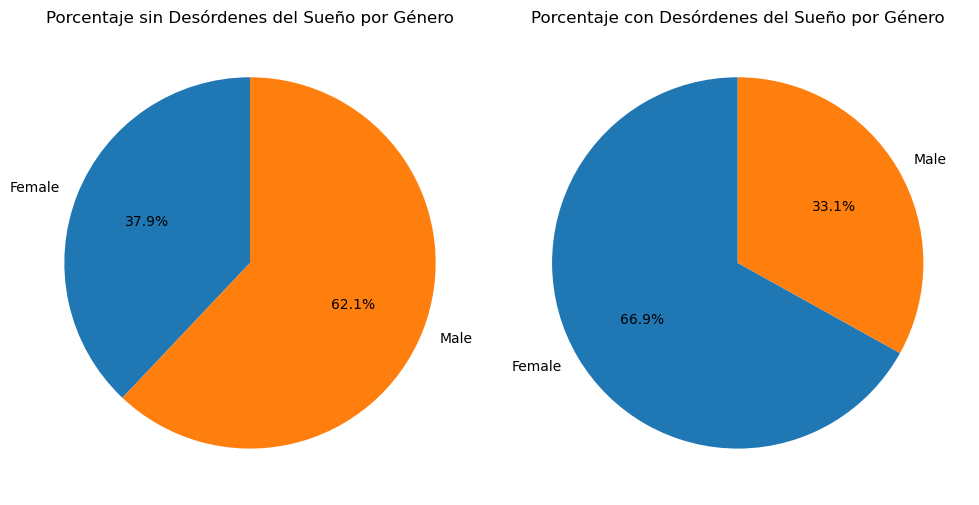

In [5]:
# PIE CHART SHOWING THE PERCENTAGE OF PEOPLE SUFFERING SLEEP DISORDERS BY GENDER AS WELL AS PEOPLE WITHOUT SLEEP DISORDERS

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\\Users\\AMD\\Desktop\\Sueño y estilo de vida.csv', sep=';')

# counting the amount of men and women who suffer (or not) from sleep disorders
conteo_por_genero = df.groupby(['Gender', 'Sleep Disorder']).size().unstack(fill_value=0)

# getting totals per gender (sum rows)
total_por_genero = conteo_por_genero.sum(axis=1)

# # Calculating the percentage of each category for 'sleep disorder'
porcentajes = conteo_por_genero.div(total_por_genero, axis=0) * 100

print(porcentajes)

# Crear el gráfico de pastel para 'None'
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Dividir la figura en dos partes (1 fila, 2 columnas, posición 1)
plt.pie(porcentajes['None'], labels=porcentajes.index, autopct='%.1f%%', startangle=90)
plt.title('Porcentaje sin Desórdenes del Sueño por Género')

# Crear el gráfico de pastel para otras categorías de 'sleep disorder'
plt.subplot(1, 2, 2)  # Dividir la figura en dos partes (1 fila, 2 columnas, posición 2)
plt.pie(porcentajes[['Insomnia', 'Sleep Apnea']].sum(axis=1), labels=porcentajes.index, autopct='%.1f%%', startangle=90)
plt.title('Porcentaje con Desórdenes del Sueño por Género')

plt.tight_layout()  # Ajustar el espaciado entre los gráficos
plt.show()

In [21]:
# SHOWING THE AGES WITH THE LOWEST AND HIGHEST SLEEP DISORDERS


import pandas as pd

df = pd.read_csv(r'C:\\Users\\AMD\\Desktop\\Sueño y estilo de vida.csv', sep=';')

df.fillna(0, inplace=True)

# # Grouping by 'Age' and 'Sleep Disorder' and counting the cases

# conteo_por_edad_y_sleep_disorder = df.groupby(['Age', 'Sleep Disorder']).size().reset_index(name='Count')

# conteo_por_edad_y_sleep_disorder

# ###

edad_min_sleep_disorders = conteo_por_edad_y_sleep_disorder.loc[conteo_por_edad_y_sleep_disorder['Count'].idxmin()]


edad_max_sleep_disorders = conteo_por_edad_y_sleep_disorder.loc[conteo_por_edad_y_sleep_disorder['Count'].idxmax()]

print("Edad con el menor número de Sleep Disorders:")
print(edad_min_sleep_disorders)

print("\nEdad con el mayor número de Sleep Disorders:")
print(edad_max_sleep_disorders)


Edad con el menor número de Sleep Disorders:
Age                 27
Sleep Disorder    None
Count                1
Name: 0, dtype: object

Edad con el mayor número de Sleep Disorders:
Age                     44
Sleep Disorder    Insomnia
Count                   28
Name: 35, dtype: object


In [6]:
# SHOWING THE PHYSICAL ACTIVITY LEVEL OF PEOPLE OVER 44 YEARS OLD AS WELL AS THEIR BMI CATEGORY

import pandas as pd

df = pd.read_csv(r'C:\\Users\\AMD\\Desktop\\Sueño y estilo de vida.csv', sep=';')

df.fillna(0, inplace=True)

# filtering rows where age is 44 and chosing columns 'BMI Category' and 'Physical Activity Level'
datos_personas_44_anios = df.loc[df['Age'] == 44, ['BMI Category', 'Physical Activity Level']]

datos_personas_44_anios



,BMI Category,Physical Activity Level
220,Overweight,45
221,Overweight,45
222,Overweight,45
223,Overweight,45
224,Overweight,45
225,Overweight,45
226,Overweight,45
227,Overweight,45
228,Overweight,45
229,Overweight,45


In [23]:
# SHOWING THE DIFFERENT STRESS LEVELS OF EACH BMI CATEGORY TO DETERMINE IF THERE IS A RELATION BETWEEN THE TWO

import pandas as pd

df = pd.read_csv(r'C:\\Users\\AMD\\Desktop\\Sueño y estilo de vida.csv', sep=';')

df.fillna(0, inplace=True)

# conteo_sleep_disorder = df['Sleep Disorder'].value_counts()

# print(conteo_sleep_disorder)


# datos_personas_sleep_apnea = df.loc[df['Sleep Disorder'] == 'Sleep Apnea', ['BMI Category', 'Stress Level']]

# datos_personas_sleep_apnea


,BMI Category,Stress Level
3,Obese,8
4,Obese,8
16,Normal,7
17,Normal,8
30,Normal,7
...,...,...
369,Overweight,3
370,Overweight,3
371,Overweight,3
372,Overweight,3
